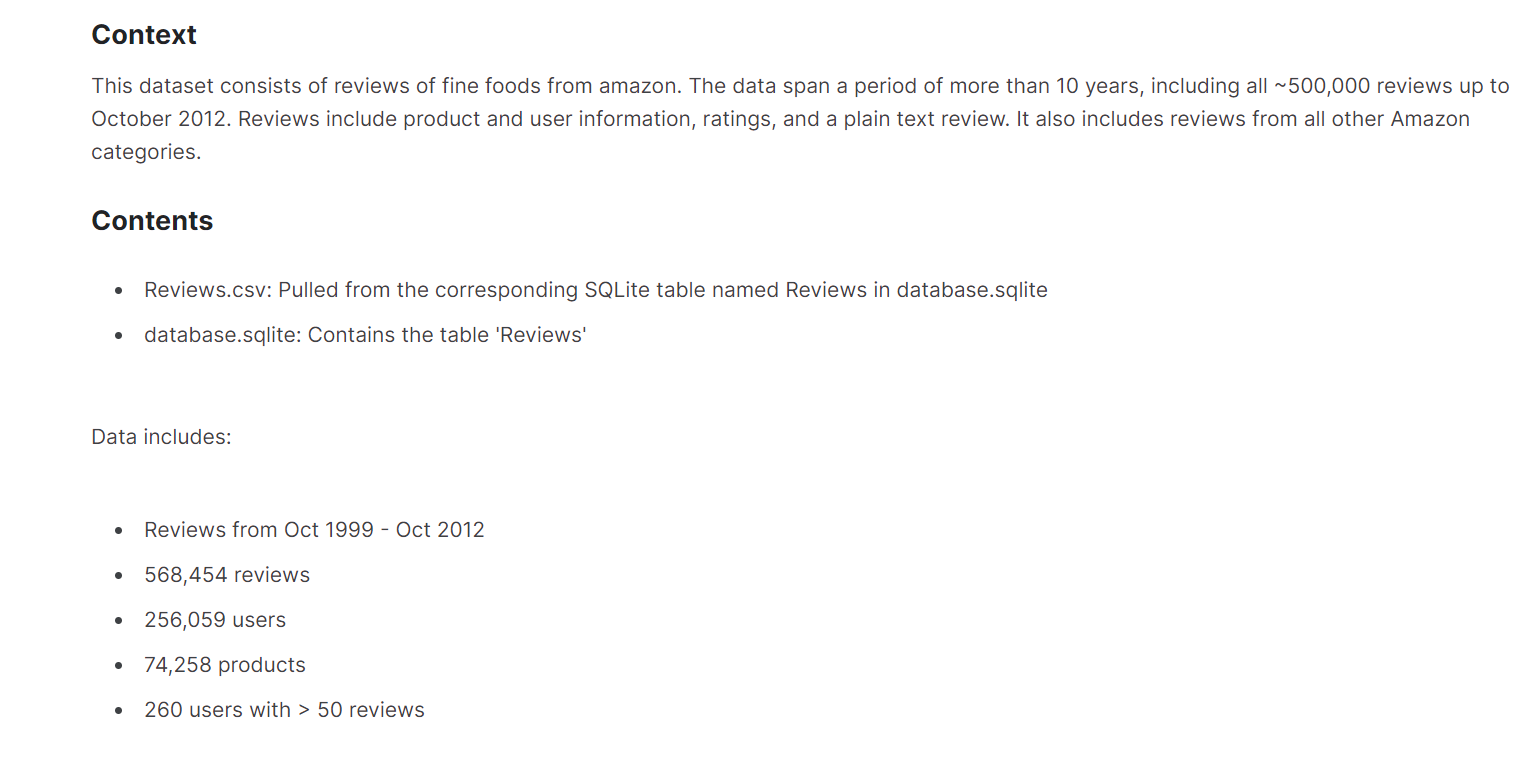

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
import nltk
import string
import sqlite3

In [2]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
con = sqlite3.connect('database.sqlite')
con

In [27]:
dataset = pd.read_sql_query(""" select * from Reviews where Score !=3 LIMIT 5000""", con)
#dataset = pd.read_sql_query(""" select * from Reviews """, con)
dataset.shape

(5000, 10)

In [23]:
dataset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [28]:
dataset['Score'].value_counts()

Score
5    3420
4     767
1     504
2     309
Name: count, dtype: int64

In [29]:
def threshold(x):
    if x < 3:
        return 0
    return 1

In [30]:
df = dataset['Score']

In [31]:
positivenegative = df.map(threshold)
dataset['Score'] = positivenegative
print("Our dataset points", dataset.shape)

Our dataset points (5000, 10)


In [32]:
dataset['Score'].value_counts()

Score
1    4187
0     813
Name: count, dtype: int64

In [33]:
dataset.duplicated().sum().sum()

0

In [18]:
dataset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [34]:
dataset.shape

(5000, 10)

In [35]:
final = dataset[dataset.HelpfulnessNumerator <= dataset.HelpfulnessDenominator]

In [36]:
final.shape

(5000, 10)

In [37]:
final.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


# NLP Concept

In [39]:
sent_0 = final['Text'].values[0]
print(sent_0)
print("="*50)

sent_100 = final['Text'].values[100]
print(sent_100)
print("="*50)

sent_2500 = final['Text'].values[2500]
print(sent_2500)
print("="*50)

sent_3107 = final['Text'].values[3107]
print(sent_3107)
print("="*50)

sent_4089 = final['Text'].values[4089]
print(sent_4089)

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
I was diappointed in the flavor and texture of this mix.  I usually like most of the Low Carb things I have tried, but was diappointed in this specific one.
The small, white popcorn is the best!  Very delicious - and I've tried lots.
We had previously tried another brand of hot coca k-cups. We bought these since they seemed to be a pretty good value. We actually like the taste and flavor of these more than the other brand we tried. They have just the right amount of cocoa and sweetness. We like the variety of flavors in the pack also.
Dried berries, still with texture and the quintessential aroma. Pot roast is so much better with half a dozen berries flattened into the breadboard and scooped into the pickling mixture. But in t

In [42]:
stopwords = set(['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'don',
 "don't",
 'should',
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ain',
 'aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't",'just', 'were', 'go', 'done', 'his', 'nothing', 'alone', 'should', 'next', 'off', 'amount', "'ll", 'give', 'of', 'another', 'much', 'else', 'top', 'each', 'amongst', 'while', 'toward', 'whatever', 'beside', 'whole', 'say', 'beforehand', 'those', "'ve", 'but', 'upon', 'beyond', 'rather', 'which', 'many', 'these', 'both', 'i', 'ca', 'ten', 'really', 'my', 'across', 'neither', 'throughout', 'please', 'less', 'once', 'most', 'everywhere', 'make', 'nevertheless', 'also', 'anyone', 'well', 'nowhere', 'keep', 'them', 'becomes', 'thereby', 'first', 'already', 'whereby', 'become', 'none', 'wherein', 'nine', 'ours', '‘ve', 'put', 'our', 'anyway', 'might', '‘d', 'never', 'unless', 'seeming', 'every', 'mostly', 'yourself', 'mine', '’ll', 'not', 'though', 'there', 'after', 'onto', 'am', 'afterwards', 'all', 'above', 'indeed', 'only', 'during', 'has', '’ve', 'since', 'except', 'became', 'becoming', 'among', 'us', 'side', 'you', 'do', 'by', 'front', 'namely', 'and', 'five', 'why', 'everything', 'without', 'whence', 'hers', 'still', 'can', '’m', 'either', 'wherever', 'when', 'besides', 'always', 'thence', "'s", 'however', 'himself', 'around', 'down', "'m", 'enough', 'formerly', 'very', 'n’t', 'too', 'been', 'could', 'otherwise', 'own', 'she', 'forty', 'it', 'several', 'yours', 'now', 'two', 'perhaps', 're', 'sometime', 'thus', 'name', 'until', 'are', 'regarding', 'no', 'therefore', 'may', 'an', 'be', 'one', 'under', 'so', 'bottom', 'doing', 'see', 'being', 'get', 'had', 'serious', 'anywhere', 'due', 'something', 'this', 'whose', 'twenty', 'where', 'then', '‘s', 'from', 'than', 'we', 'full', 'hereafter', 'least', 'hence', 'such', 'any', 'towards', 'therein', 'thru', 'below', '‘m', 'thereupon', 'twelve', "'d", 'about', 'have', 'themselves', 'whoever', 'whereupon', 'fifteen', 'empty', 'show', 'behind', 'over', 'does', 'will', 'further', 'herein', 'various', 'sometimes', 'between', 'anyhow', 'move', 'her', 'made', 'itself', 'four', '‘ll', "'re", 'did', 'even', 'a', 'he', '‘re', 'thereafter', 'nobody', 'others', '’re', 'whither', 'with', 'the', 'used', 'ever', 'part', 'because', 'herself', 'me', 'within', 'eleven', 'nor', 'other', 'would', 'they', 'sixty', 'to', 'noone', 'often', 'against', 'into', 'whereas', 'third', 'call', 'here', 'along', 'hundred', 'latterly', 'seems', 'your', 'anything', 'seem', 'their', 'everyone', 'at', 'in', 'via', 'three', 'him', 'out', 'what', 'latter', 'same', 'whether', 'cannot', 'together', 'how', 'whereafter', 'somehow', 'quite', '’s', 'hereupon', '’d', 'was', 'through', 'some', 'someone', 'n‘t', 'as', 'myself', 'last', 'who', 'whom', 'up', 'take', 'yourselves', 'eight', 'or', 'almost', 'more', 'six', 'before', 'again', "n't", 'whenever', 'its', 'although', 'former', 'is', 'few', 'moreover', 'using', 'must', 'meanwhile', 'elsewhere', 'hereby', 'if', 'yet', 'on', 'back', 'that', 'seemed', 'per', 'ourselves', 'fifty', 'for', 'somewhere'])

In [43]:
stopwords

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'ain',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'aren',
 "aren't",
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except

In [45]:
from tqdm import tqdm
import re
from bs4 import BeautifulSoup

preprocessed_rewviews = []

for sentence in tqdm(final['Text'].values):
    sentence = re.sub(r"http\S+","", sentence)
    sentence = BeautifulSoup(sentence, 'lxml').get_text()
    sentence = re.sub('[^A-Za-z]+',' ',sentence)
    sentence = ' '.join(e.lower() for e in sentence.split() if e.lower() not in stopwords)
    preprocessed_rewviews.append(sentence.strip())

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:01<00:00, 4034.31it/s]


In [ ]:
# what does " ". join will be


In [49]:
preprocessed_rewviews[4000]

'giving stars family didnt mind taste texture grainy biscuts fell apart easily fan pancakes believe didnt good flavor wasting money tiny package bigger package regular mix fair allergies opinion'

In [50]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# emojis - emotions, symbols & pictographs, transport & map symbols, flags, food

# TF-IDF : Feature Extraction

In [60]:
tfidf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tfidf_vect.fit(preprocessed_rewviews)
print("Some Feature name", tfidf_vect.get_feature_names_out()[1500:1550])

print("="*50)

tfidf_vect_counts = tfidf_vect.transform(preprocessed_rewviews)
print("The type of tfidf vectorizer :", type(tfidf_vect_counts))
print("The shape of the tfidf :", tfidf_vect_counts.get_shape())
print("The number of unique words", tfidf_vect_counts.get_shape()[1])

Some Feature name ['met' 'metal' 'mg' 'mic' 'microphone' 'microwave' 'mics' 'mid' 'middle'
 'mild' 'miles' 'milk' 'milk chocolate' 'mill' 'mind' 'minerals' 'mini'
 'mint' 'minute' 'minutes' 'misleading' 'miss' 'missed' 'missing'
 'mistake' 'mix' 'mix makes' 'mix pancakes' 'mixed' 'mixes' 'mixing'
 'mixture' 'moderate' 'modified' 'moist' 'molasses' 'mom' 'money' 'month'
 'month old' 'monthly' 'months' 'months ago' 'morning' 'mornings' 'mother'
 'mountain' 'mouth' 'moved' 'movie']
The type of tfidf vectorizer : <class 'scipy.sparse._csr.csr_matrix'>
The shape of the tfidf : (5000, 2671)
The number of unique words 2671


In [63]:
x = pd.DataFrame(tfidf_vect_counts.toarray())

In [64]:
x

,0,1,2,3,4,5,6,7,8,9,...,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.188585,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.293450,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [67]:
x.shape

(5000, 2671)

In [65]:
y = final['Score']
y.shape

(5000,)

In [66]:
y

0       1
1       0
2       1
3       0
4       1
       ..
4995    0
4996    1
4997    1
4998    0
4999    0
Name: Score, Length: 5000, dtype: int64